In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import sys
from scipy.interpolate import griddata
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colorbar
from matplotlib import rc
from scipy.optimize import fsolve
from scipy.integrate import simpson
from numpy import trapz
from numpy.polynomial.polynomial import polyfit
from scipy import integrate

plt.rcParams["font.family"] = "Times New Roman"
mpl.rcParams['axes.linewidth'] = 5

In [4]:
def arr_loc(val,X):
   ind = 0
   for i in range(len(X)):
      if(round(float(X[i]),2) == round(val,2)):
         ind = i
         break
   return ind

In [5]:
def kappa_half_filling_line_plots_old(Text_dir_charge_gap,Graph_dir,N,u_hf,dtau):


    filename_dK_dT = "%s/Text_files_N_%s_U_%s_dtau_%s/Charge_gap_data_N_%s_U_%s_dtau_%s.dat"%(Text_dir_charge_gap,N,N,u_hf[0],dtau,u_hf[0],dtau)
    beta,dkdt,dkdt_std = np.loadtxt(filename_dK_dT,unpack = 'True',usecols = [0,3,4])

    print(beta)
    Kappa = np.zeros((len(beta),len(u_hf)))
    Kappa_std = np.zeros((len(beta),len(u_hf)))
    dK_dT = np.zeros((len(beta),len(u_hf)))      #dkappa_dT.tolist()
    dK_dT_std = np.zeros((len(beta),len(u_hf)))  #dkappa_dT_std.tolist()
    T = np.zeros((len(beta),len(u_hf)))      #T.tolist()
    U = np.zeros((len(beta),len(u_hf)))      #[float(U[0])*x for x in [1]*len(Trot)]
    beta_len = len(beta)
    u_len = len(u_hf)
    
    for i in range(len(u_hf)):
        filename_dK_dT = "%s/Text_files_N_%s_U_%s_dtau_%s/Charge_gap_data_N_%s_U_%s_dtau_%s.dat"%(Text_dir_charge_gap,N,u_hf[i],dtau,N,u_hf[i],dtau)
        beta,kappa,kappa_std,dkdt,dkdt_std = np.loadtxt(filename_dK_dT,unpack = 'True',usecols = [0,1,2,3,4])
        T[:,i] = np.power(np.asarray(beta),1)
        Kappa[:,i] = np.copy(kappa)
        Kappa_std[:,i] = np.copy(kappa_std)
        dK_dT[:,i] = np.copy(dkdt)
        dK_dT_std[:,i] = np.copy(dkdt_std)
        U[:,i] = float(u_hf[i])*np.ones(len(beta))


   
    plt.figure(figsize = (25,20))
    plt.xticks([0,2,4,6,8,10],fontsize = 120)
    plt.yticks([0.0,0.1,0.2,0.3],fontsize = 120)
    plt.xlim(0,10.5)
    plt.ylim(-0.01,0.35)
    color = ["red","orange","goldenrod","blue","purple"]
    c1 = 0
    for k in range(len(T[:,0])):
           temp_val = T[k,0]
           plt.errorbar(U[k,:],Kappa[k,:],yerr = Kappa_std[k,:],marker = "o",markersize = 25,elinewidth = 3,capsize = 5,label = "T=%s"%str(round(temp_val,3)))
           c1 = c1+1 
    #plt.axhline(y=0,color = "black",linestyle = "dashed")
    plt.grid(True,which = "both")
    
    #plt.yscale('log')
    #plt.legend(loc = "best", fontsize = 80)
    #plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
    plt.tight_layout()
    plt.savefig("%s/Kappa_half_filling_N_%s.png"%(Graph_dir,N))

    

In [6]:
def kappa_half_filling_line_plots(Text_dir_charge_gap,Graph_dir,N,u_hf,dtau,Trot):


    Kappa_hf = np.zeros((len(Trot),len(u_hf)+2))
    Kappa_hf_std = np.zeros((len(Trot),len(u_hf)+2))
    U = np.zeros(len(u_hf)+2)   
    
    for i in range(len(u_hf)):
        U[i] = float(u_hf[i])
        for k in range(len(Trot)):
        
            filename_dK_dT = "%s/Text_files_N_%s_U_%s_dtau_%s/Charge_gap_data_N_%s_U_%s_dtau_%s_L_%s.dat"%(Text_dir_charge_gap,N,u_hf[i],dtau,N,u_hf[i],dtau,Trot[k])
            mu_val,nden,kappa,kappa_std = np.loadtxt(filename_dK_dT,unpack = 'True',usecols = [0,1,3,4])
            zero_ind = arr_loc(0.0,mu_val)
            Kappa_hf[k,i] = kappa[zero_ind]
            Kappa_hf_std[k,i] = kappa_std[zero_ind]
            


    Kappa_hf[0][-2] = 0.08479532163742688
    Kappa_hf[1][-2] = 0.0725146198830409
    Kappa_hf[2][-2] = 0.06198830409356728
    Kappa_hf[3][-2] = 0.052631578947368376

    Kappa_hf[0][-1] = 0.021052631578947142 
    Kappa_hf[1][-1] = 0.009356725146198841
    Kappa_hf[2][-1] = 0.00467836257309924
    Kappa_hf[3][-1] = 0.0017543859649121335

    U[-2] = 6
    U[-1] = 10
    
    plt.figure(figsize = (25,20))
    plt.xticks([0,2,4,6,8,10],fontsize = 120)
    plt.yticks([0.0,0.1,0.2,0.3],fontsize = 120)
    plt.xlim(0,10.5)
    plt.ylim(-0.01,0.35)
    plt.tick_params(axis='both', which='major', direction='out', pad=20,length = 30, width = 2.5,labelsize = 120)
    plt.tick_params(axis='both', which='minor', direction='out', pad=20,length = 15, width = 1.5,labelsize = 60)
    color = ["red","orange","goldenrod","blue","purple"]
    c1 = 0
    for k in range(len(Trot)):
           temp_val = 1/(float(dtau)*float(Trot[k]))
           plt.errorbar(np.take(U,np.argsort(U)),np.take(Kappa_hf[k,:],np.argsort(U)),color = color[c1],yerr = Kappa_hf_std[k,:],marker = "o",markersize = 25,elinewidth = 3,capsize = 5,label = "T=%s"%str(round(temp_val,3)))
           c1 = c1+1 
        
    plt.grid(True,which = "both")
    plt.tight_layout()
    plt.savefig("%s/Kappa_half_filling_N_%s.png"%(Graph_dir,N))

    

In [7]:
def dkappa_dT_half_filling_line_plots(Text_dir_charge_gap,Graph_dir,N,u_hf,dtau):


    filename_dK_dT = "%s/Charge_gap_half_filling_data_N_%s_U_%s_dtau_%s.dat"%(Text_dir_charge_gap,N,u_hf[0],dtau)
    beta,dkdt,dkdt_std = np.loadtxt(filename_dK_dT,unpack = 'True',usecols = [0,3,4])

    print(beta)
    Kappa = np.zeros((len(beta),len(u_hf)))
    Kappa_std = np.zeros((len(beta),len(u_hf)))
    dK_dT = np.zeros((len(beta),len(u_hf)))      #dkappa_dT.tolist()
    dK_dT_std = np.zeros((len(beta),len(u_hf)))  #dkappa_dT_std.tolist()
    T_val = np.zeros(len(beta))      #T.tolist()
    U_val = np.zeros(len(u_hf))      #[float(U[0])*x for x in [1]*len(Trot)]
    
    beta_len = len(beta)
    #u_len = len(u_hf)
    #max_den = np.zeros(len(beta))
    #Temp = np.zeros(len(beta))
    #nfit = np.arange(1.0,1.5,0.005)

    
    for i in range(len(u_hf)):
        filename_dK_dT = "%s/Charge_gap_half_filling_data_N_%s_U_%s_dtau_%s.dat"%(Text_dir_charge_gap,N,u_hf[i],dtau)
        beta,dkdt,dkdt_std = np.loadtxt(filename_dK_dT,unpack = 'True',usecols = [0,3,4])
        T_val = np.power(np.asarray(beta[:beta_len]),1)
        #print("T",T_val)
        print("U",u_hf[i])
        print(beta)
        print("====================================================")
        dK_dT[:,i] = np.copy(dkdt[:beta_len])
        dK_dT_std[:,i] = np.copy(dkdt_std[:beta_len])
        U_val[i] = float(u_hf[i])
        


    plt.figure(figsize = (75,70))
    plt.xticks([3,3.5,4,4.5,5],fontsize = 120)
    plt.yticks([0.0,0.04,0.08,0.12],fontsize = 120)
    color = ["red","goldenrod","orange","blue"] #,"purple"]
    plt.xlim(3,5.1)
    plt.tick_params(axis='both', which='major', direction='out', pad=20,length = 30, width = 2.5,labelsize = 120)
    plt.tick_params(axis='both', which='minor', direction='out', pad=20,length = 15, width = 1.5,labelsize = 60)
    c1 = 0
    for k in range(len(T_val)):
        temp_val = T_val[k]
        print("T",T_val[k])
        
        if round(temp_val,2) == 0.40: 
           plt.errorbar(U_val,dK_dT[k,:],yerr = dK_dT_std[k,:],c = 'blue',marker = "o",markersize = 25,elinewidth = 3,capsize = 5,label = "T=%s"%str(round(temp_val,3)))

        if round(temp_val,2) == 0.50: 
           plt.errorbar(U_val,dK_dT[k,:],yerr = dK_dT_std[k,:],c = 'darkgoldenrod',marker = "o",markersize = 25,elinewidth = 3,capsize = 5,label = "T=%s"%str(round(temp_val,3)))

        if round(temp_val,3) == 0.667: 
           plt.errorbar(U_val,dK_dT[k,:],yerr = dK_dT_std[k,:],c = 'orange',marker = "o",markersize = 25,elinewidth = 3,capsize = 5,label = "T=%s"%str(round(temp_val,3)))

        if round(temp_val,2) == 1.00: 
           plt.errorbar(U_val,dK_dT[k,:],yerr = dK_dT_std[k,:],c = 'red', marker = "o",markersize = 25,elinewidth = 3,capsize = 5,label = "T=%s"%str(round(temp_val,3)))

    
            
    plt.axhline(y=0,color = "black",linestyle = "dashed")
    plt.grid(True,which = "both")
    plt.legend(loc = "best", ncol = 4, fontsize = 80)
    #plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
    plt.tight_layout()
    plt.savefig("%s/dKappa_dT_half_filling_N_%s.png"%(Graph_dir,N))
    

    

In [10]:
def main():

    N = "10"
    dtau = "0.05"
    
    #============== This is for the kappa plots ==================================
    #U_hf = ["1.0","2.0","3.0","4.00","5.0","7.0"] 
    
    #============== This is for dkappa/dT plots ==================================
    U_hf = ["3.20","3.30","3.40","3.50","3.60","3.70","3.80","3.90","4.00","4.10","4.20","4.30","4.40","4.50","4.60","4.70","4.80","4.90","5.00","5.10","5.20","5.30"]
    
    Trot = ["20","30","40","50"] 
    Text_dir_charge_gap = "/Users/roy.369/Documents/Cold_atom_correlators/FHM_Legacy_data/FHM_Roy_data/Text_files/Text_files_N_%s_charge_gap_half_filling/Text_files_N_%s_dtau_%s"%(N,N,dtau)
    Graph_dir_charge_gap = "/Users/roy.369/Documents/Cold_atom_correlators/FHM_Legacy_data/FHM_Roy_data/Graphs/Graphs_N_%s_half_filling/Graphs_N_%s_charge_gap"%(N,N)

    if not os.path.exists(Graph_dir_charge_gap):
       os.makedirs(Graph_dir_charge_gap) 

    #charge_gap_contour_plots(Text_dir_charge_gap,Graph_dir_charge_gap,N,U_hf,dtau)
    #dkappa_dT_half_filling_line_plots(Text_dir_charge_gap,Graph_dir_charge_gap,N,U_hf,dtau)
    #kappa_half_filling_line_plots(Text_dir_charge_gap,Graph_dir_charge_gap,N,U_hf,dtau,Trot)


    x = np.linspace(0,10,num = 1001)
    y1 = 18*x+2
    y2 = 10*(x-0.00)**2+2


    plt.figure(figsize = (25,20))
    plt.xticks([])
    plt.yticks([])
    plt.plot(x,y1,color = 'red', linewidth = 5, label = r"$T_{c}^{\text{TDOS}}$")
    plt.plot(x,y2,color ='blue',linewidth = 5, label = r"$T_{c}^{\text{DOS}}$")
    plt.xlim(0,1)
    plt.ylim(3,10)
    plt.legend(loc = 'lower right', fontsize = 100)
    plt.tight_layout()
    plt.savefig("%s/Metal_insulator_crossover.png"%Graph_dir_charge_gap)         



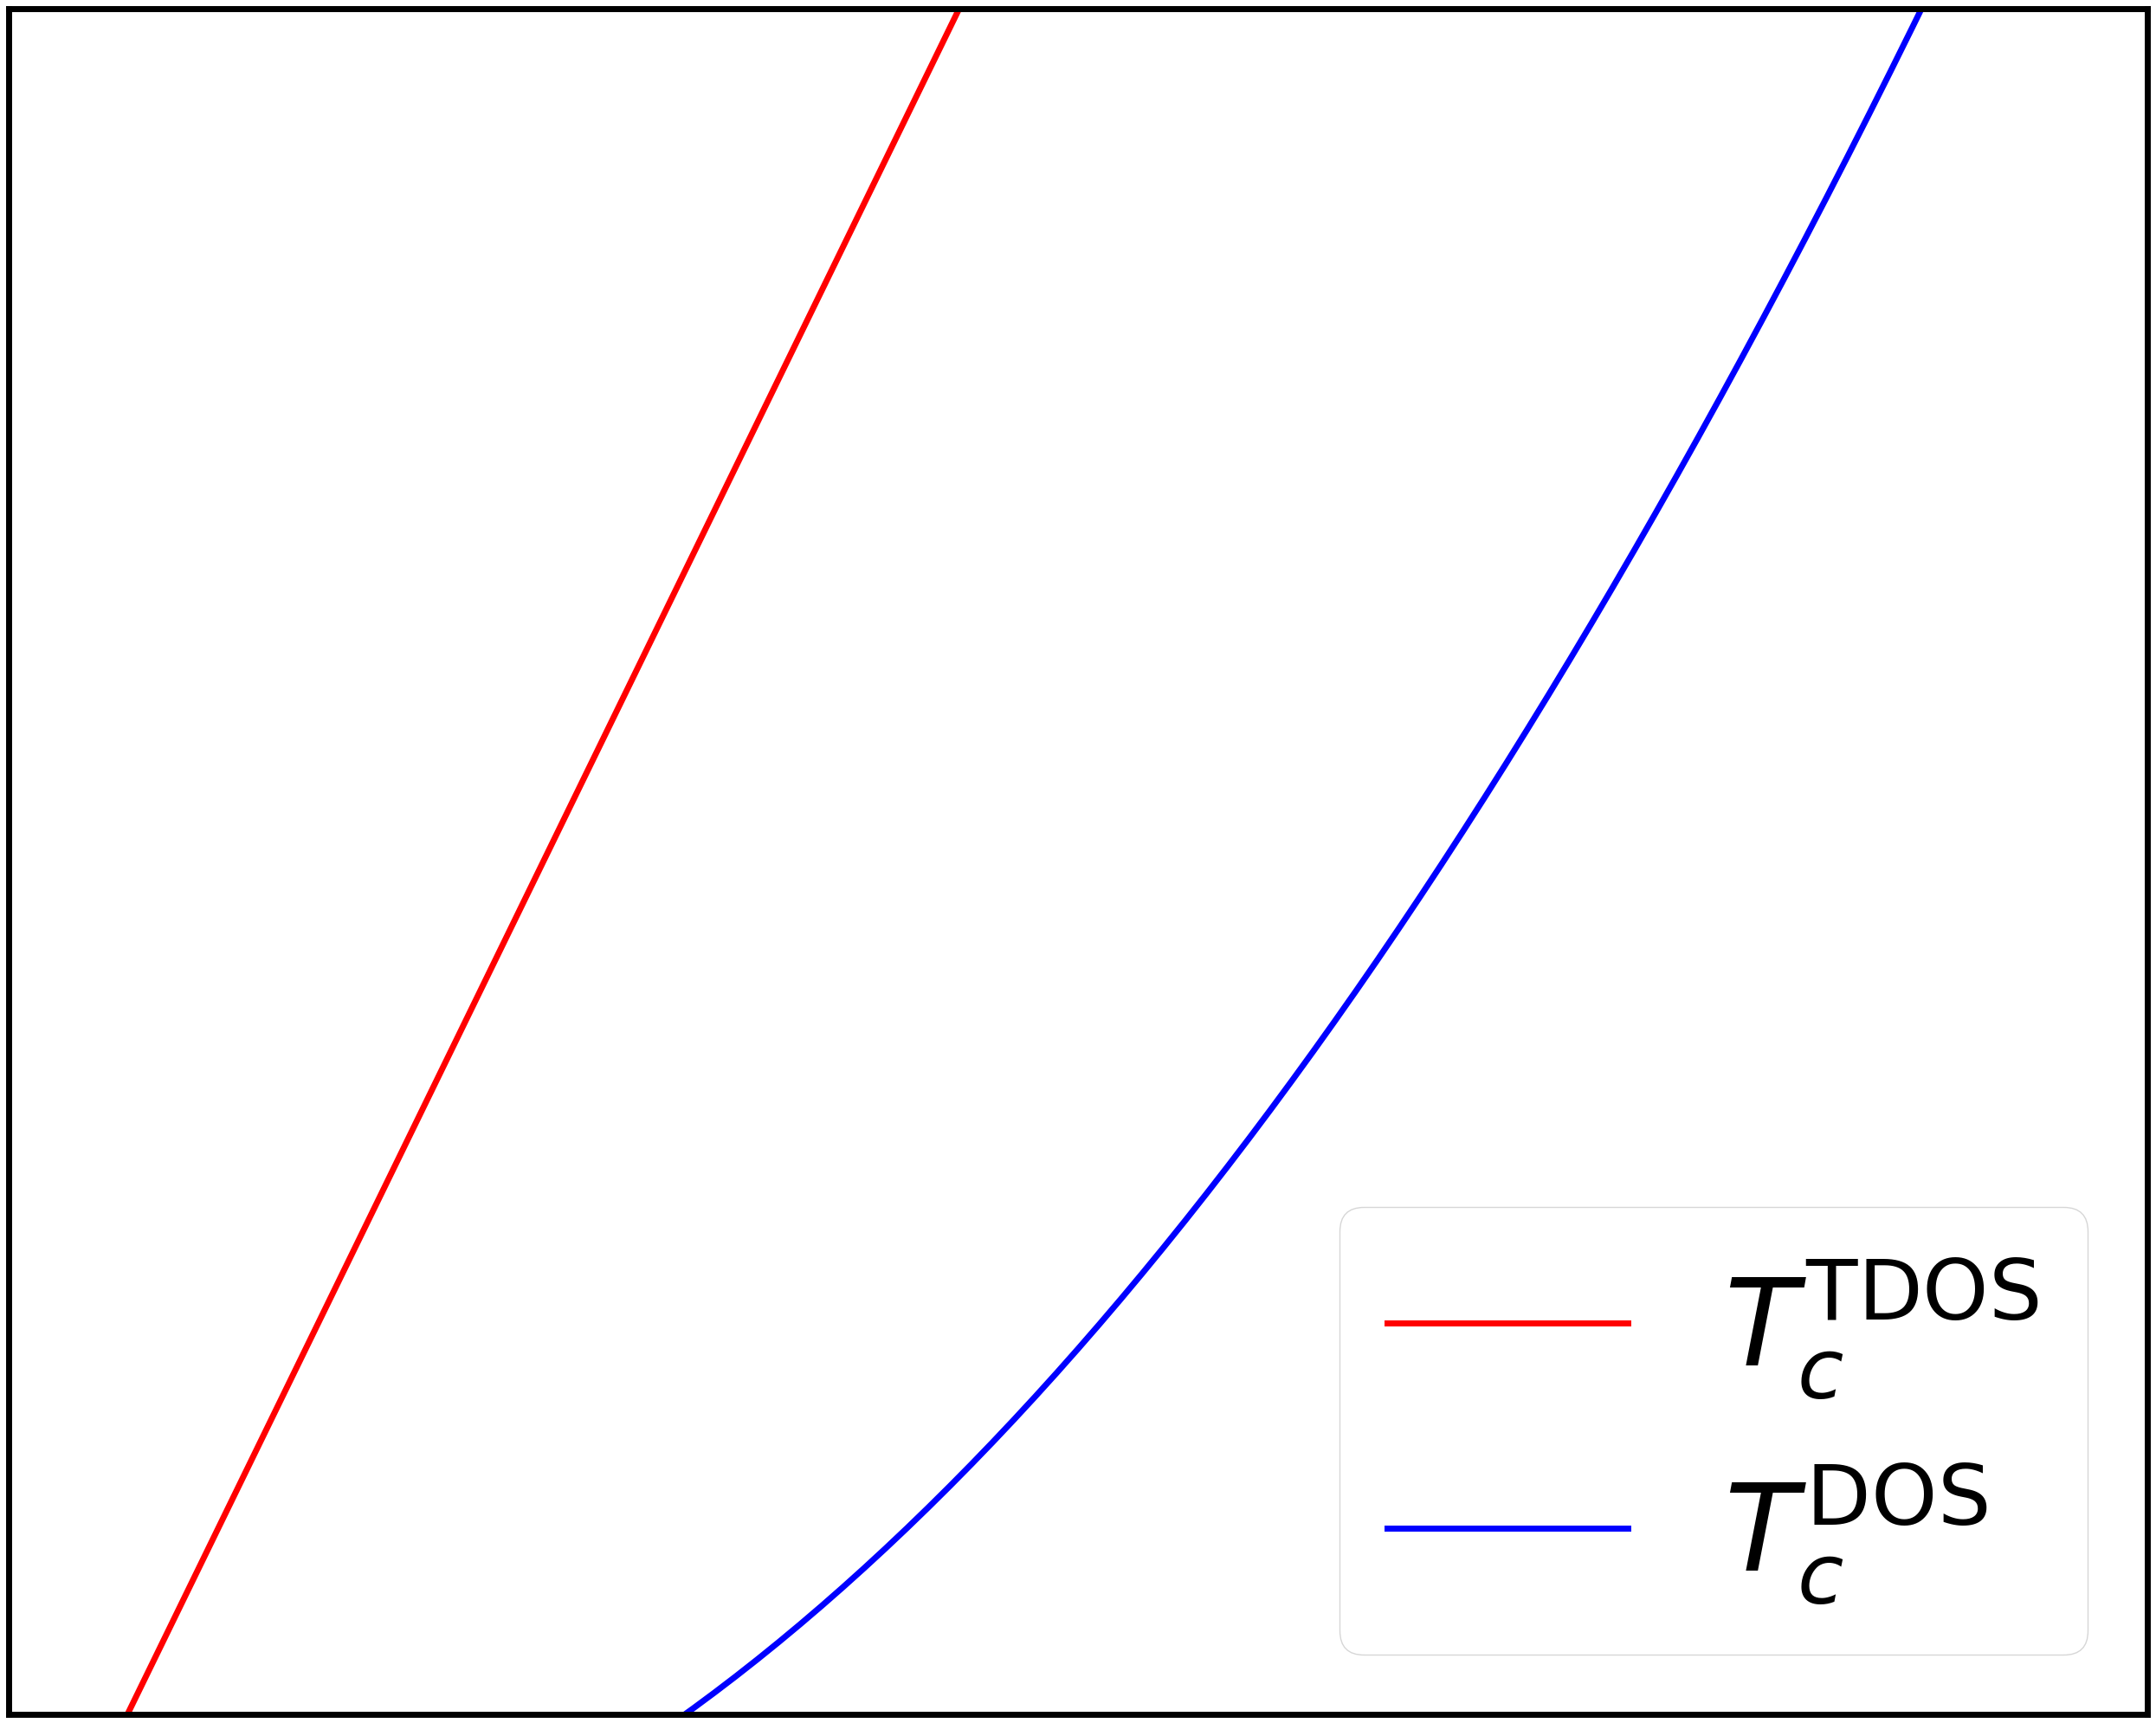

In [11]:
main()

In [ ]:
A = np.arange(0,10)
B = np.reshape(A,(5,2))
C = np.reshape(A,(2,5))

In [ ]:
print(A)

In [ ]:
print(B)

In [83]:
print(C)

[[0 1 2 3 4]
 [5 6 7 8 9]]


(3.0, 10.0)

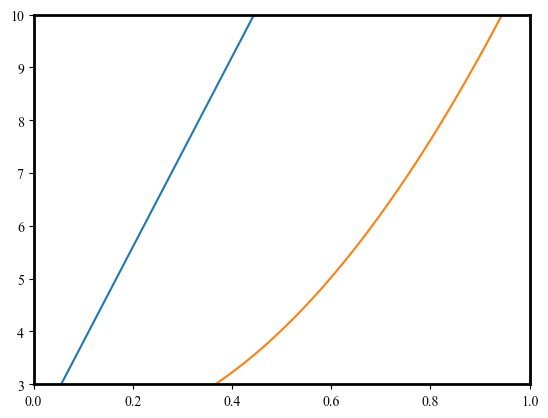

In [36]:
import numpy as np
import matplotlib.pyplot as plt




In [97]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(1,10)
y = np.arange(1,10)


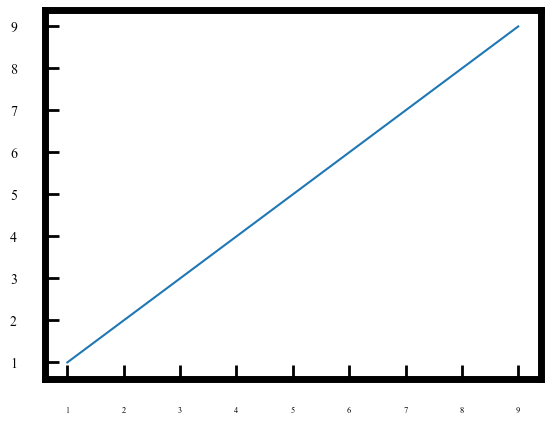

In [103]:
plt.figure()
plt.xticks(fontsize = 6)
plt.tick_params(axis='both', which='both', direction='in', pad=20,length=10, width=2)
plt.plot(x,y)